In [ ]:
!pip uninstall tensorflow-cpu

In [4]:
!pip install tensorflow-cpu==2.9.1

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.models import Sequential
import cv2
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,UpSampling2D,GlobalAveragePooling2D,BatchNormalization
from pathlib import Path
from tensorflow.keras.preprocessing import image
import random 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, MaxPool2D, Dropout
import os

In [3]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
m_pics = load_images(r"D:\SEM 6\Deep  Learning Lab\transfer learning\cats_dog_ds\cats")

print(len(m_pics))

299


In [5]:
wm_pics = load_images(r"D:\SEM 6\Deep  Learning Lab\transfer learning\cats_dog_ds\dogs")
print(len(wm_pics))

301


In [6]:
import matplotlib.pyplot as plt

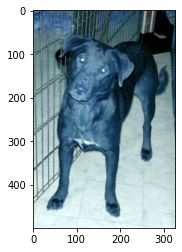

In [7]:
plt.imshow(wm_pics[1])

In [8]:
my_seed = 0
np.random.seed(my_seed)

random.seed(my_seed)
tf.random.set_seed(my_seed)

In [9]:
data_dir_train=r'D:\\SEM 6\Deep  Learning Lab\\transfer learning\\cats_dog_ds'

In [10]:
batch_size = 32
img_height = 224
img_width = 224

In [11]:
#train_ds = ##todo
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 601 files belonging to 2 classes.
Using 481 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 601 files belonging to 2 classes.
Using 120 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


In [14]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True,
        validation_split=0.20)

training_set = train_datagen.flow_from_directory(data_dir_train,
                                                 target_size = (img_height, img_width),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',subset='training')

val_set = train_datagen.flow_from_directory(data_dir_train,
                                          target_size = (img_height, img_width),
                                          batch_size = batch_size,
                                          class_mode = 'categorical',subset='validation')

Found 481 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [15]:
IMAGE_SIZE = [224, 224]

In [16]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)#top=false we need to declare the no.of classes

In [17]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
# don't train existing weights
for layer in vgg.layers:
      layer.trainable = False

In [29]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(250, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 200)               5017800   
                                                                 
 dense_9 (Dense)             (None, 200)               40200     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 250)               50250     
                                                                 
 dense_11 (Dense)            (None, 2)                

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [32]:
hist = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

C:\Users\Lenono\anaconda3\envs\dl2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
16/16 [==============================] - 101s 6s/step - loss: 1.1332 - accuracy: 0.5239 - val_loss: 0.5133 - val_accuracy: 0.7667
Epoch 2/20
16/16 [==============================] - 105s 7s/step - loss: 0.6062 - accuracy: 0.7027 - val_loss: 0.2551 - val_accuracy: 0.9333
Epoch 3/20
16/16 [==============================] - 105s 7s/step - loss: 0.4427 - accuracy: 0.8087 - val_loss: 0.2069 - val_accuracy: 0.9167
Epoch 4/20
16/16 [==============================] - 105s 7s/step - loss: 0.3449 - accuracy: 0.8503 - val_loss: 0.1983 - val_accuracy: 0.8917
Epoch 5/20
16/16 [==============================] - 106s 7s/step - loss: 0.2711 - accuracy: 0.8815 - val_loss: 0.2860 - val_accuracy: 0.8750
Epoch 6/20
16/16 [==============================] - 105s 7s/step - loss: 0.1777 - accuracy: 0.9335 - val_loss: 0.1957 - val_accuracy: 0.9083
Epoch 7/20
16/16 [==============================] - 121s 8s/step - loss: 0.1552 - accuracy: 0.9293 - val_loss: 0.1800 - val_accuracy: 0.9250
Epoch 8/20
16

In [33]:
pd.DataFrame(hist.history)

,loss,accuracy,val_loss,val_accuracy
0,1.133159,0.523908,0.513302,0.766667
1,0.606187,0.702703,0.255141,0.933333
2,0.442709,0.808732,0.206933,0.916667
3,0.344943,0.850312,0.198271,0.891667
4,0.271125,0.881497,0.285993,0.875000
5,0.177708,0.933472,0.195668,0.908333
6,0.155221,0.929314,0.179967,0.925000
7,0.161249,0.933472,0.230441,0.933333
8,0.144492,0.935551,0.155031,0.925000
9,0.145058,0.941788,0.130229,0.958333


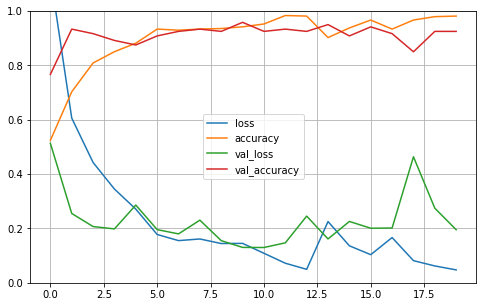

In [34]:
pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()